<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 2 / NOTE 3*

# 📝 Assignment
---

# Evaluation Metrics for Classification

### 1) Kaggle 챌린지를 이어서 진행합니다.
- **다음 조건에서 F beta score를 구하고 과제 제출폼에 제출하세요.**
    - TP = 4442, TN = 6165, FP = 1515, FN = 1930, 재현율에 정확도의 2배 가중치를 부여합니다.

In [1]:
# 변수 설정
tp = 4442
tn = 6165
fp = 1515
fn = 1930

# 가중치
beta = 2

In [2]:
# 정밀도 : 모델이 Positive로 예측한 경우 중 올바르게 예측한 경우
positive = tp+fp
precision = tp/positive

# 재현율 : 실제 Positive인 것들 중 올바르게 Positive라고 예측한경우
real_positive = tp + fn
recall = tp/real_positive

# f1 beta 스코어
f1_beta = (1+beta**2)*((precision*recall)/((beta**2*precision)+recall))

In [3]:
# 확인
precision, recall, f1_beta

(0.7456773543730065, 0.697112366603892, 0.7063126093178564)

### 2) 모델을 학습한 후 Confusion matrix를 그리고 해석하세요
- 임계값을 조정한 후 confusion matrix를 그려보세요
- **(객관식) 임계값을 증가시킬때 positive 범주에 대한 재현율의 변화 양상을 과제 제출폼에 제출하세요.**
    1. 증가
    2. 감소
    3. 변화가 없다


In [4]:
# 데이터 호출 및 split
import pandas as pd
from sklearn.model_selection import train_test_split

# target
target = 'vacc_h1n1_f'


# train, test data
train = pd.merge(pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv'), 
                 pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv')[target], left_index=True, right_index=True)
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv')


# submission form
sample_submission = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/submission.csv')

In [7]:
# train, validation의 target, 즉 y 값 나누기
y = train[target]
X_train = train.drop(target, axis=1,inplace=True)

# train, validation 나누기
X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.20, random_state=2)

In [9]:
X_train.shape, X_val.shape

((33723, 38), (8431, 38))

### simple EDA & feature engineering

In [10]:
def feature_engineering(df):
    
    # behavior : 점수가 높을 수록 더 조심하고 있음
    # behavior_careful 생성
    behaviorals = [col for col in df.columns if 'behavioral' in col] 
    df['behavior_careful'] = df[behaviorals].sum(axis=1)
    
    # 거주 구성원 : 어린이 구성원 비율, 어른 구성원 비율 컬럼 생성
    df["proportion_child"] = round((df["household_children"]/df["n_people_r"])*100, 0)
    df["proportion_adult"] = round((df["n_adult_r"]/df["n_people_r"])*100, 0)
    
    # 특성 drop
    features_del = ["employment_industry", "employment_occupation", "n_adult_r", "household_children","census_msa", "state",
                   'doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']
    df.drop(features_del, axis=1, inplace= True)
    
    return df

In [11]:
X_train_cleaned = feature_engineering(X_train)
X_val_cleaned = feature_engineering(X_val)

<ipython-input-10-45a4e5bdad2e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['behavior_careful'] = df[behaviorals].sum(axis=1)
<ipython-input-10-45a4e5bdad2e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["proportion_child"] = round((df["household_children"]/df["n_people_r"])*100, 0)
<ipython-input-10-45a4e5bdad2e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [12]:
# 확인
X_train_cleaned.shape, X_train_cleaned.columns

((33723, 31),
 Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
        'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
        'behavioral_large_gatherings', 'behavioral_outside_home',
        'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
        'child_under_6_months', 'health_insurance', 'health_worker',
        'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
        'opinion_h1n1_sick_from_vacc', 'agegrp', 'education_comp', 'raceeth4_i',
        'sex_i', 'inc_pov', 'marital', 'rent_own_r', 'employment_status',
        'census_region', 'n_people_r', 'hhs_region', 'behavior_careful',
        'proportion_child', 'proportion_adult'],
       dtype='object'))

In [13]:
# 확인
X_val_cleaned.shape, X_val_cleaned.columns

((8431, 31),
 Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
        'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
        'behavioral_large_gatherings', 'behavioral_outside_home',
        'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
        'child_under_6_months', 'health_insurance', 'health_worker',
        'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
        'opinion_h1n1_sick_from_vacc', 'agegrp', 'education_comp', 'raceeth4_i',
        'sex_i', 'inc_pov', 'marital', 'rent_own_r', 'employment_status',
        'census_region', 'n_people_r', 'hhs_region', 'behavior_careful',
        'proportion_child', 'proportion_adult'],
       dtype='object'))

### Model fit & predict

In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OrdinalEncoder,OneHotEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

In [24]:
onehot= ["employment_status"]
ordinals = ['opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc', "agegrp"]


pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True, cols=onehot), 
    OrdinalEncoder(cols=ordinals),
    KNNImputer(n_neighbors = 3, weights = 'distance'), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True, n_estimators = 150, min_samples_split = 6)
)

pipe.fit(X_train_cleaned, y_train)
print('\n훈련 정확도: ', pipe.score(X_train_cleaned, y_train))
print('검증 정확도: ', pipe.score(X_val_cleaned, y_val))

y_pred = pipe.predict(X_val_cleaned)
print('검증 f1: ', f1_score(y_val, y_pred))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):



훈련 정확도:  0.9382320671351896
검증 정확도:  0.8040564583086229
검증 f1:  0.5178050204319907


In [28]:
# 각 단계 확인
pipe.named_steps

{'onehotencoder': OneHotEncoder(cols=['employment_status'], use_cat_names=True),
 'ordinalencoder': OrdinalEncoder(cols=['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
                      'opinion_h1n1_sick_from_vacc', 'agegrp'],
                mapping=[{'col': 'opinion_h1n1_vacc_effective',
                          'data_type': dtype('O'),
                          'mapping': Somewhat Effective      1
 NaN                     2
 Very Effective          3
 Dont Know               4
 Not At All Effective    5
 Not Very Effective      6
 Refused                 7
 dtype: int64},
                         {'col': 'opinion_h1n1_risk', 'data_type': dtype('O'),
                          'mapping'...
 Somewhat High    4
 Very High        5
 Dont Know        6
 Refused          7
 dtype: int64},
                         {'col': 'opinion_h1n1_sick_from_vacc',
                          'data_type': dtype('O'),
                          'mapping': Not Very Worried      1
 NaN             

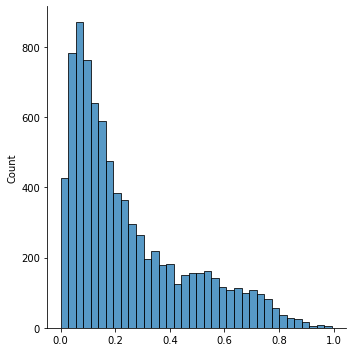

In [31]:
import seaborn as sns
# y_pred_proba = pipe.predict_proba(X_val)[:, 0]
y_pred_proba = pipe.predict_proba(X_val)[:, 1]
y_pred_proba

sns.displot(y_pred_proba);

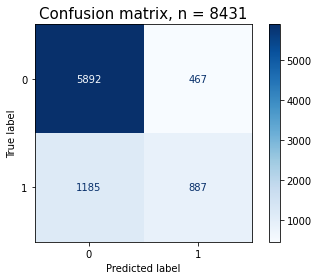

In [53]:
# 오차 행렬 - 시각화
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
matrix = plot_confusion_matrix(pipe, X_val_cleaned, y_val,
                            cmap = plt.cm.Blues,
                            ax = ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [65]:
# 재현율 확인 - 함수
def recall_check(model, X, y, threshold):
    
    confmat = confusion_matrix(y_true=y_val, y_pred=y_pred)
    y_pred_proba = model.predict_proba(X)[:, 1]
    y_pred_threshold = y_pred_proba > threshold
    
    print('정밀도: %.3f' % precision_score(y_true=y, y_pred=y_pred_threshold)) 
    print('재현율: %.3f' % recall_score(y_true=y, y_pred=y_pred_threshold))

In [66]:
# 임계값(threshold)= 0.2
recall_check(pipe, X_val_cleaned, y_val, 0.2)

정밀도: 0.433
재현율: 0.790


In [67]:
# 임계값(threshold)= 0.5
recall_check(pipe, X_val_cleaned, y_val, 0.5)

정밀도: 0.433
재현율: 0.790


In [68]:
# 임계값(threshold)= 0.5
recall_check(pipe, X_val_cleaned, y_val, 0.8)

정밀도: 0.849
재현율: 0.052


### 3) 랜덤포레스트의 n_estimator를 1, 10, 100, 1000으로 바꾸어 가며 positive 범주의 predict_proba를 비교해 보세요
- 파라미터는 다음과 같이 설정합니다.
    - n_jobs=-1, random_state=10, max_depth=None, n_estimators = n
- **(객관식) 확률값들의 분포(종류)의 변화를 과제 제출폼에 제출하세요**
    1. 다양해진다
    2. 변화가없다


n_estimators = 1 일때


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  d


훈련 정확도:  0.8501616107700976
검증 정확도:  0.7619499466255486
검증 f1:  0.4839290305991258


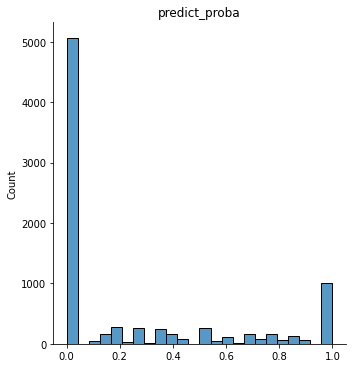

In [77]:
# 파이프라인 구축
pipe_1 = make_pipeline(
    OneHotEncoder(use_cat_names=True, cols=onehot), 
    OrdinalEncoder(cols=ordinals),
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True, n_estimators = 1, min_samples_split = 6)
)
print("n_estimators = 1 일때")

# 모델 학습 및 정확도 측정
pipe_1.fit(X_train_cleaned, y_train)
print('\n훈련 정확도: ', pipe_1.score(X_train_cleaned, y_train))
print('검증 정확도: ', pipe_1.score(X_val_cleaned, y_val))

# f1 score
y_pred_1 = pipe_1.predict(X_val_cleaned)
print('검증 f1: ', f1_score(y_val, y_pred_1))

# 확률값 분포
y_pred_proba_1 = pipe_1.predict_proba(X_val)[:, 1]
sns.displot(y_pred_proba_1)
plt.title("predict_proba")
plt.show()

n_estimators = 10 일때


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  d


훈련 정확도:  0.9239094979687453
검증 정확도:  0.8121219309690428
검증 f1:  0.5507657402155417


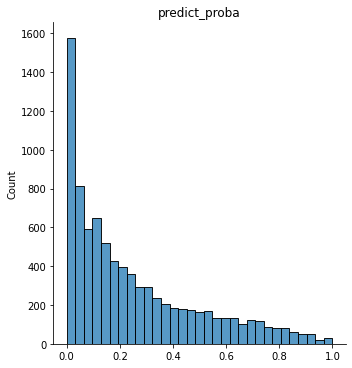

In [79]:
# 파이프라인 구축
pipe_10 = make_pipeline(
    OneHotEncoder(use_cat_names=True, cols=onehot), 
    OrdinalEncoder(cols=ordinals),
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True, n_estimators = 10, min_samples_split = 6)
)
print("n_estimators = 10 일때")

# 모델 학습 및 정확도 측정
pipe_10.fit(X_train_cleaned, y_train)
print('\n훈련 정확도: ', pipe_10.score(X_train_cleaned, y_train))
print('검증 정확도: ', pipe_10.score(X_val_cleaned, y_val))

# f1 score
y_pred_10 = pipe_10.predict(X_val_cleaned)
print('검증 f1: ', f1_score(y_val, y_pred_10))

# 확률값 분포
y_pred_proba_10 = pipe_10.predict_proba(X_val_cleaned)[:, 1]
sns.displot(y_pred_proba_10)
plt.title("predict_proba")
plt.show()

n_estimators = 100 일때


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):



훈련 정확도:  0.9333096106514841
검증 정확도:  0.8239829201755426
검증 f1:  0.5648093841642229


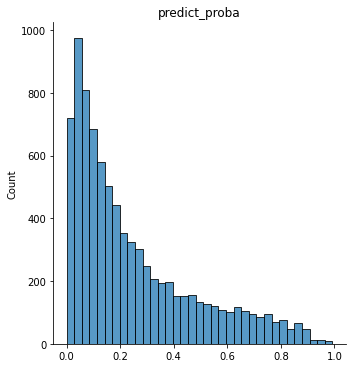

In [80]:
# 파이프라인 구축
pipe_100 = make_pipeline(
    OneHotEncoder(use_cat_names=True, cols=onehot), 
    OrdinalEncoder(cols=ordinals),
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True, n_estimators = 100, min_samples_split = 6)
)
print("n_estimators = 100 일때")

# 모델 학습 및 정확도 측정
pipe_100.fit(X_train_cleaned, y_train)
print('\n훈련 정확도: ', pipe_100.score(X_train_cleaned, y_train))
print('검증 정확도: ', pipe_100.score(X_val_cleaned, y_val))

# f1 score
y_pred_100 = pipe_100.predict(X_val_cleaned)
print('검증 f1: ', f1_score(y_val, y_pred_100))

# 확률값 분포
y_pred_proba_100 = pipe_100.predict_proba(X_val_cleaned)[:, 1]
sns.displot(y_pred_proba_100)
plt.title("predict_proba")
plt.show()

n_estimators = 1000 일때


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):



훈련 정확도:  0.9334578774130415
검증 정확도:  0.8241015300676077
검증 f1:  0.5654849106358043


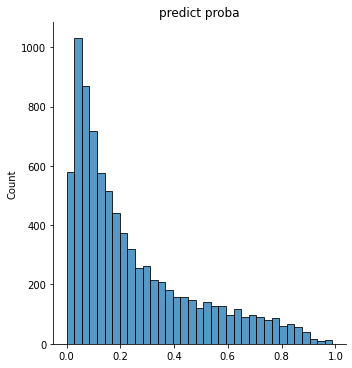

In [81]:
# 파이프라인 구축
pipe_1000 = make_pipeline(
    OneHotEncoder(use_cat_names=True, cols=onehot), 
    OrdinalEncoder(cols=ordinals),
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True, n_estimators = 1000, min_samples_split = 6)
)
print("n_estimators = 1000 일때")

# 모델 학습 및 정확도 측정
pipe_1000.fit(X_train_cleaned, y_train)
print('\n훈련 정확도: ', pipe_1000.score(X_train_cleaned, y_train))
print('검증 정확도: ', pipe_1000.score(X_val_cleaned, y_val))

# f1 score
y_pred_1000 = pipe_1000.predict(X_val_cleaned)
print('검증 f1: ', f1_score(y_val, y_pred_1000))

# 확률값 분포
y_pred_proba_1000 = pipe_1000.predict_proba(X_val_cleaned)[:, 1]
sns.displot(y_pred_proba_1000)
plt.title("predict proba")
plt.show()

### 4) 두개 이상의 다른 분류 모델을 학습시켜 ROC curve, AUC 점수를 비교하고 설명합니다.
- 더 좋은 결과가 나오는 모델을 사용해서 캐글에 제출하세요
- **캐글 Leaderboard의 본인 Score를 과제 제출폼에 제출하세요.**

0.7057952550758024

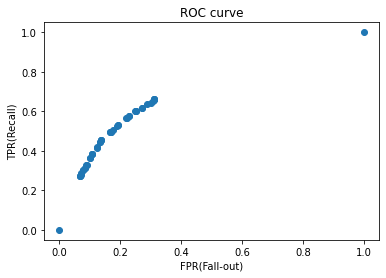

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score

auc_score_1 = roc_auc_score(y_val, y_pred_proba_1)
fpr_1, tpr_1, thresholds_1 = roc_curve(y_val, y_pred_proba_1)

roc_1 = pd.DataFrame({'FPR(Fall-out)': fpr_1, 
                      'TPRate(Recall)': tpr_1, 
                      'Threshold': thresholds_1
})

plt.scatter(fpr_1, tpr_1)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')

auc_score_1

0.813884806503536

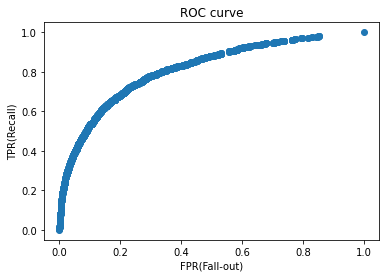

In [96]:
auc_score_10 = roc_auc_score(y_val, y_pred_proba_10)
fpr_10, tpr_10, thresholds_10 = roc_curve(y_val, y_pred_proba_10)

roc_10 = pd.DataFrame({'FPR(Fall-out)': fpr_10, 
                      'TPRate(Recall)': tpr_10, 
                      'Threshold': thresholds_10
})

plt.scatter(fpr_10, tpr_10)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')

auc_score_10

0.8373425376491896

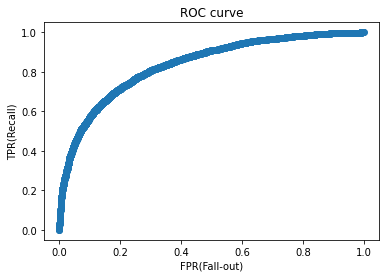

In [97]:
auc_score_100 = roc_auc_score(y_val, y_pred_proba_100)
fpr_100, tpr_100, thresholds_100 = roc_curve(y_val, y_pred_proba_100)

roc_100 = pd.DataFrame({'FPR(Fall-out)': fpr_100, 
                      'TPRate(Recall)': tpr_100, 
                      'Threshold': thresholds_100
})

plt.scatter(fpr_100, tpr_100)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')

auc_score_100

0.8384292229236404

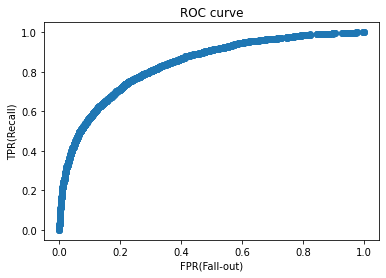

In [98]:
auc_score_1000 = roc_auc_score(y_val, y_pred_proba_1000)
fpr_1000, tpr_1000, thresholds_1000 = roc_curve(y_val, y_pred_proba_1000)

roc_1000 = pd.DataFrame({'FPR(Fall-out)': fpr_1000, 
                      'TPRate(Recall)': tpr_1000, 
                      'Threshold': thresholds_1000
})

plt.scatter(fpr_1000, tpr_1000)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')

auc_score_1000